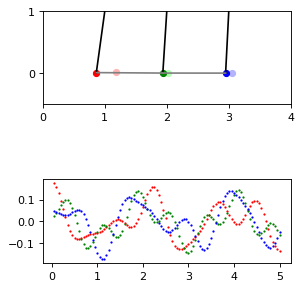

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
import math
from IPython import display

# Function to get acceleration of the pendulums, based off of Lagrangian Mechanics. The variable 'alpha1' refers to the 
# angular acceleration of the angle phi between the vertical and the first pendulum's string, the 'alpha2' variable refers to the 
# angular acceleration of the angle phi between the vertical and the second pendulum's string, and the 'alpha3' variable refers  
# to the angular acceleration of the angle phi between the vertical and the second pendulum's string.
def acc(phi1, phi2, phi3, g, k):
    alpha1 = -1*(phi1*(g + k) - phi2*k);
    alpha2 = -1*(-phi1*k - phi3*k + phi2*(g + 2*k));
    alpha3 = -1*(phi3*(g + k) - phi2*k);
    
    return alpha1, alpha2, alpha3;

def main():
    
    # defining necessary variables for the simulation.
    t = 0;
    tf = 5;
    dt = 0.05;
    N = int(np.ceil(tf/dt));
    plotRealTime = True;
    
    # defining the physical variables.
    phi1 = random.random()*math.pi/16;
    phi2 = random.random()*math.pi/16;
    phi3 = random.random()*math.pi/16;
    
    x1i = 1;
    x2i = 2;
    x3i = 3;
    
    x1 = math.sin(phi1);
    x2 = math.sin(phi2);
    x3 = math.sin(phi3);
    
    x1t = x1i + x1;
    x2t = x2i + x2;
    x3t = x3i + x3;
    
    x1s = x1t;
    x2s = x2t;
    x3s = x3t;
    
    y1 = 1 - math.cos(phi1);
    y2 = 1 - math.cos(phi2);
    y3 = 1 - math.cos(phi3);
    
    y1s = y1;
    y2s = y2;
    y3s = y3;
        
    g = 9.8;
    k = 20;
    
    # objects are released at rest.
    omega1 = 0;
    omega2 = 0;
    omega3 = 0;
    
   
    acl = acc(phi1, phi2, phi3, g, k);
    alpha1 = acl[0];
    alpha2 = acl[1];
    alpha3 = acl[2];
    
    # creating the plots and turning interactive plotting on to animate our results.
    plt.ion();
    fig = plt.figure(figsize=(4,5), dpi=80);
    grid = plt.GridSpec(3, 1, wspace=0.0, hspace=0.3);
    ax1 = plt.subplot(grid[0:2,0]);
    ax2 = plt.subplot(grid[2,0]);
    
    for i in range(N):
        
        # updating 'phi1', 'phi2', and 'phi3' based on the acceleration function created above and using the leapfrog 
        # integration technique.
        phi1 += omega1*dt + 0.5*alpha1*dt**2;
        omega1 += alpha1*dt/2.0;
        phi2 += omega2*dt + 0.5*alpha2*dt**2;
        omega2 += alpha2*dt/2.0;
        phi3 += omega3*dt + 0.5*alpha3*dt**2;
        omega3 += alpha3*dt/2.0;
        
        
        acl = acc(phi1, phi2, phi3, g, k);
        alpha1 = acl[0];
        alpha2 = acl[1];
        alpha3 = acl[2];
        omega1 += alpha1*dt/2.0;
        omega2 += alpha2*dt/2.0;
        omega3 += alpha3*dt/2.0;
        t += dt;
        
        x1 = math.sin(phi1);
        x2 = math.sin(phi2);
        x3 = math.sin(phi3);
        x1t = x1i + x1;
        x2t = x2i + x2;
        x3t = x3i + x3;
        
        y1 = -(1 - (x1t - x1i)**2)**(0.5) + 1;
        y2 = -(1 - (x2t - x2i)**2)**(0.5) + 1;
        y3 = -(1 - (x3t - x3i)**2)**(0.5) + 1;
        
        if plotRealTime or (i == N-1):
            
            px1 = [x1i,x1t];
            px2 = [x2i,x2t];
            px3 = [x3i,x3t];
            py1 = [1,y1];
            py2 = [1,y2];
            py3 = [1,y3];
            
            spx1 = [x1t, x2t];
            spx2 = [x2t, x3t];
            spy1 = [y1, y2];
            spy2 = [y2, y3];
            
            # graph the second plot with the position 'x' with respect to time.
            plt.sca(ax2);
            plt.scatter(t,x1,color='red',s=1);
            plt.scatter(t,x2,color='green',s=1);
            plt.scatter(t,x3,color='blue',s=1);
            
            # clear graphs for every iteration and plot the positions of the pendulums (with the strings drawn)
            # the position is plotted as 'y' vs. 'x'.
            plt.sca(ax1);
            plt.cla();
            
            plt.scatter(x1s,y1s,s=30,color=[1,0.7,0.7]);
            plt.scatter(x2s,y2s,s=30,color=[0.7,1,0.7]);
            plt.scatter(x3s,y3s,s=30,color=[0.7,0.7,1]);
            
            plt.scatter(x1t,y1,s=30,color='red');
            plt.scatter(x2t,y2,s=30,color='green');
            plt.scatter(x3t,y3,s=30,color='blue');
            
            plt.plot(px1, py1, color = 'black');
            plt.plot(px2, py2, color = 'black');
            plt.plot(px3, py3, color = 'black');
            
            plt.plot(spx1, spy1, color = 'gray');
            plt.plot(spx2, spy2, color = 'gray');
            
            ax1.set(xlim=(0, 4), ylim=(-0.5, 1));
            ax1.set_aspect('equal', 'box');
            ax1.set_xticks([0,1,2,3,4]);
            ax1.set_yticks([0,1]);
            
            # the part of the code that animates results rather than plotting a graph for each iteration of the 'for' loop.
            display.display(plt.gcf());
            display.clear_output(wait=True);
            fig.canvas.draw();
            fig.canvas.flush_events();
    return 0;

if __name__== "__main__":
    main()